In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("HR_comma_sep.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [36]:
#are there any missing values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

<Axes: >

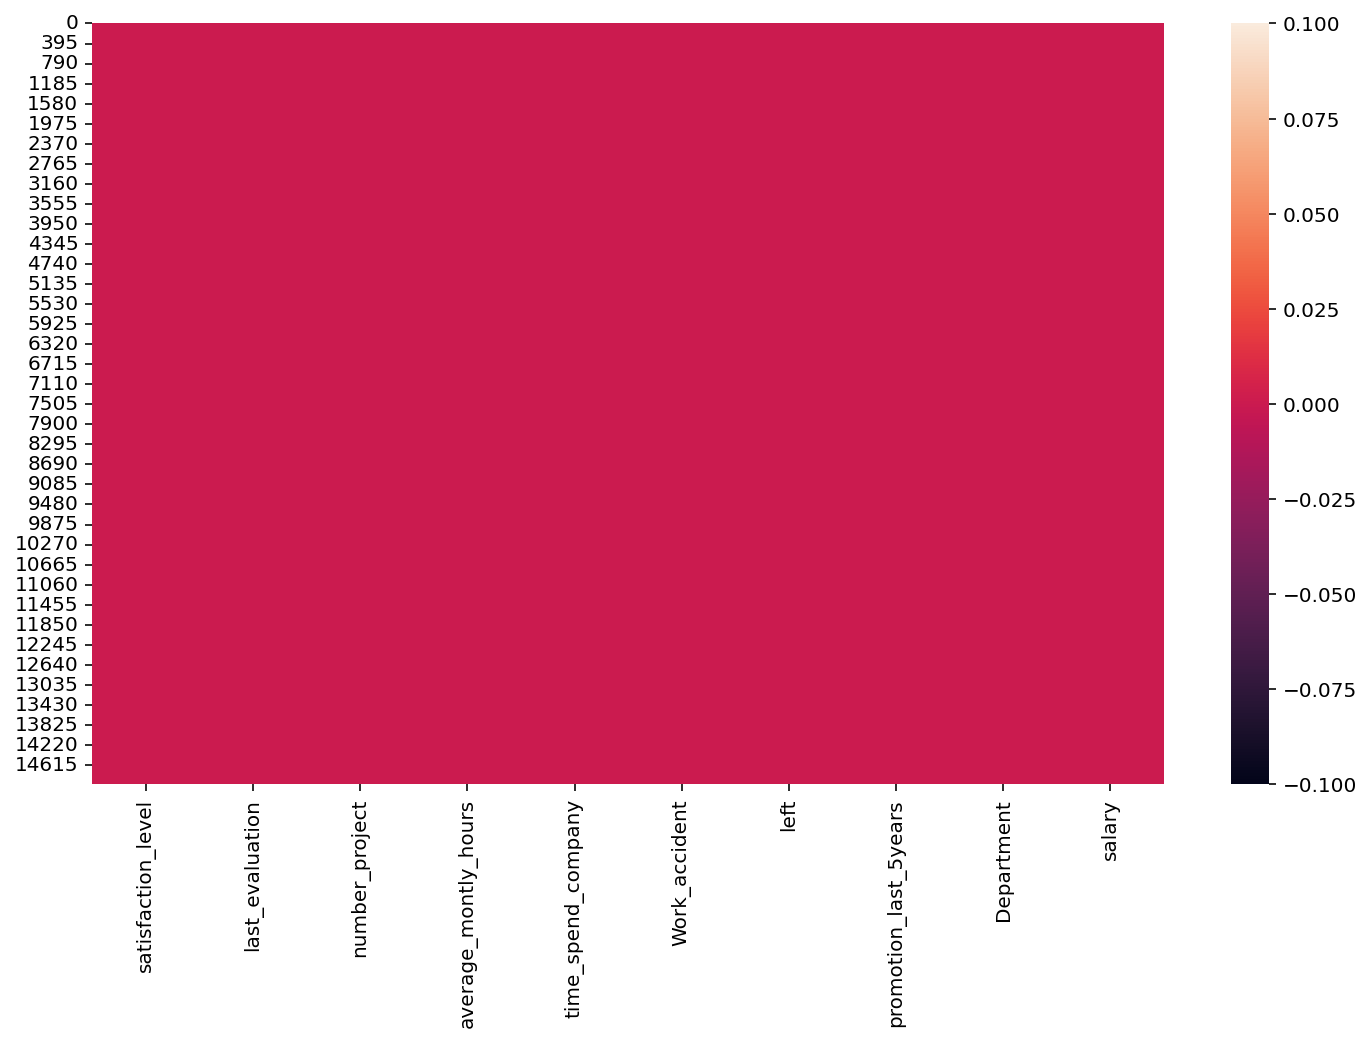

In [5]:
sns.heatmap(data.isnull())

In [37]:
dup = data.duplicated().any()
print('are there any duplicates', dup)

are there any duplicates True


In [38]:
data = data.drop_duplicates()

In [9]:
print('there are', data.shape[0], 'rows')
print('there are', data.shape[1], 'columns')

there are 11991 rows
there are 10 columns


In [12]:
#which department has the most workaccidents
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [15]:
data['Department'].nunique()

10

In [25]:
most_hours_department = data.sort_values('average_montly_hours', ascending=False).iloc[0]['Department']
print(f"The department that works the most hours is: {most_hours_department}")

The department that works the most hours is: sales


In [27]:
#which department has he most accidents at work
most_hours_department = data.sort_values('Work_accident', ascending=False).iloc[0]['Department']
print(f"The department that has the most accidents is: {most_hours_department}")

The department that works the most hours is: RandD


In [28]:
#department that has the highest salary
highest_salary_department = data.sort_values('salary', ascending=False).iloc[0]['Department']
print(f"The department with the highest salary is: {highest_salary_department}")

The department with the highest salary is: management


In [43]:
#department with the highest number of projects
highest_num_of_pro = data.sort_values('number_project', ascending=False).iloc[0]['Department']
print(f"The department with the most number of projects is: {highest_num_of_pro}")

The department with the most number of projects is: product_mng


In [41]:
#department that gets the most promotions
most_promotions = data.sort_values('promotion_last_5years', ascending=False).iloc[0]['Department']
print(f"The department with the most number of projects is: {most_promotions}")

The department with the most number of projects is: sales


In [46]:
#which people leave the department the most
left = data.sort_values('left', ascending=False).iloc[0]['Department']
print(f"The department left the most is: {left}")

The department left the most is: sales


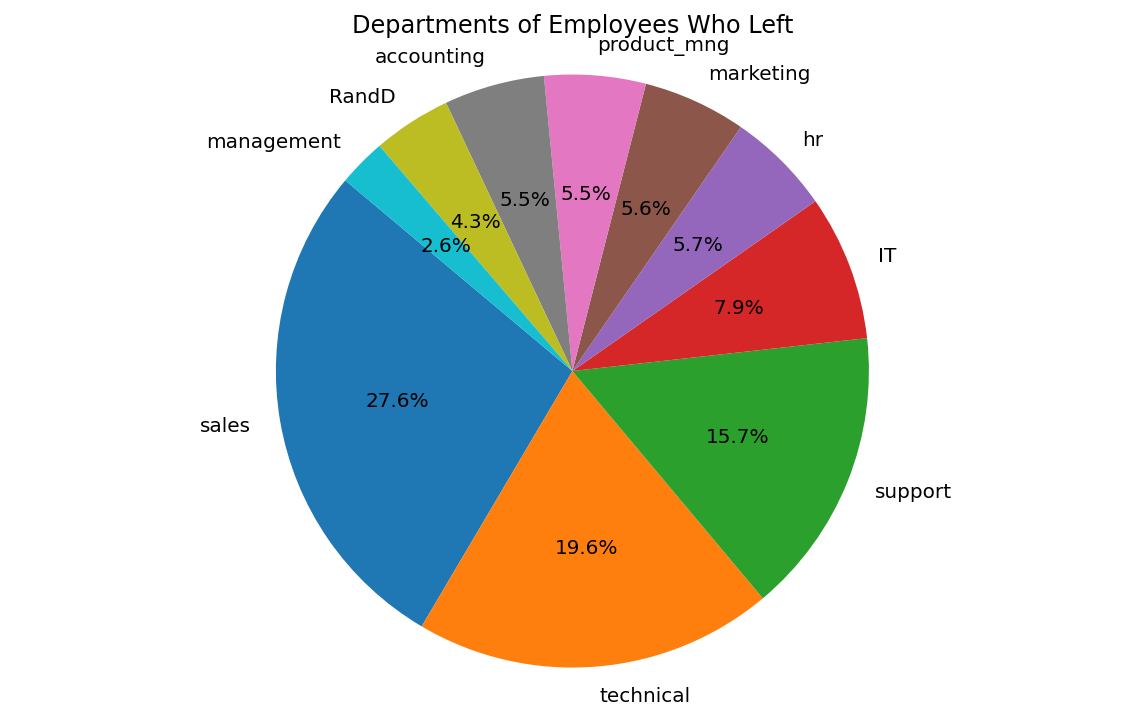

In [47]:
# Filter the data for employees who left
left_data = data[data['left'] == 1]

# Count the number of employees who left in each department
department_left_count = left_data['Department'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(department_left_count, labels=department_left_count.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Departments of Employees Who Left')
plt.show()

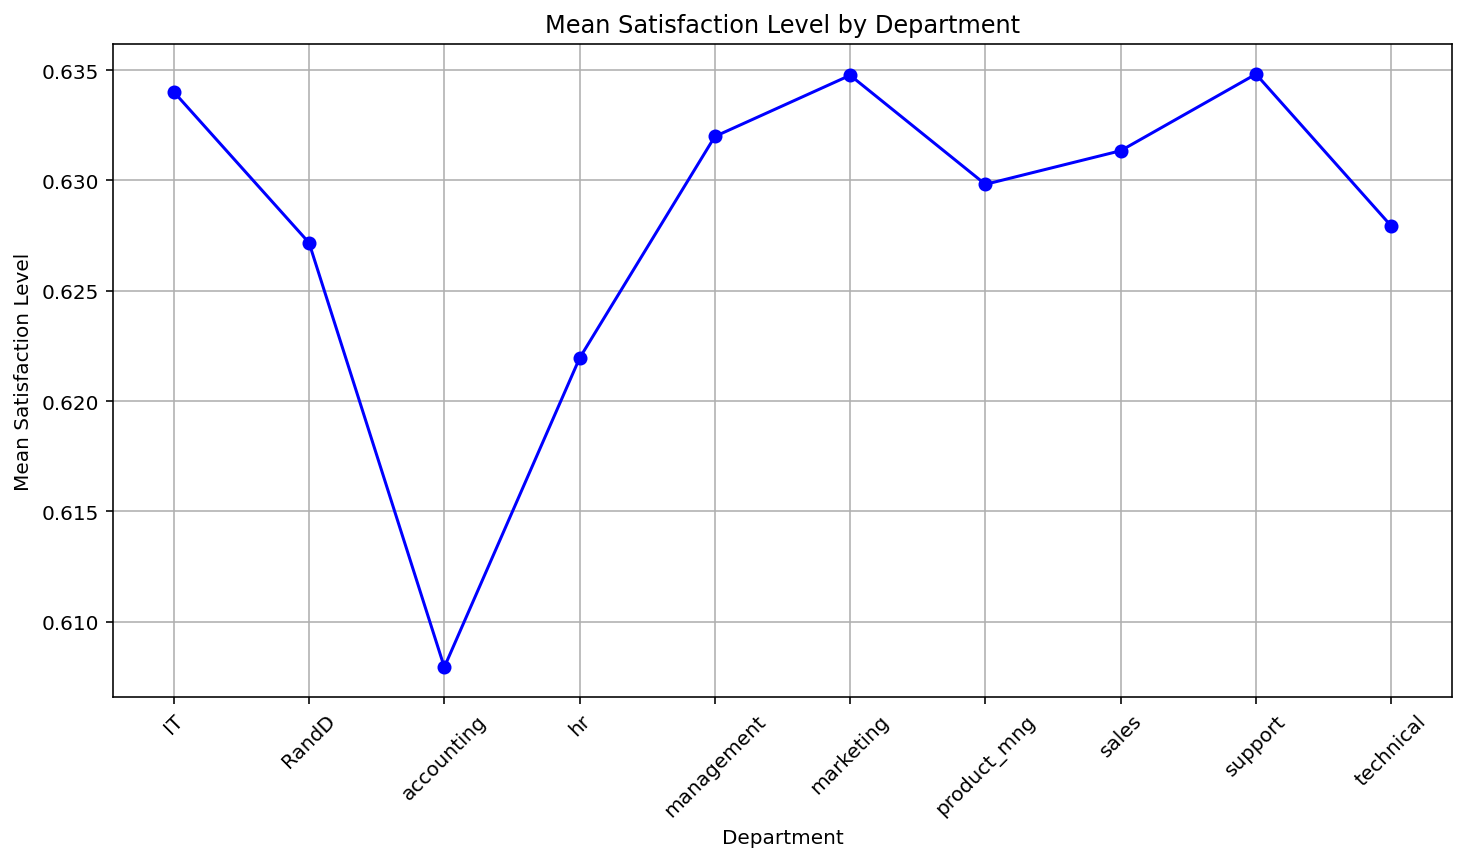

In [49]:
# Group the data by Department and calculate the mean satisfaction level for each department
department_satisfaction_mean = data.groupby('Department')['satisfaction_level'].mean()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(department_satisfaction_mean.index, department_satisfaction_mean.values, marker='o', color='b', linestyle='-')
plt.xlabel('Department')
plt.ylabel('Mean Satisfaction Level')
plt.title('Mean Satisfaction Level by Department')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

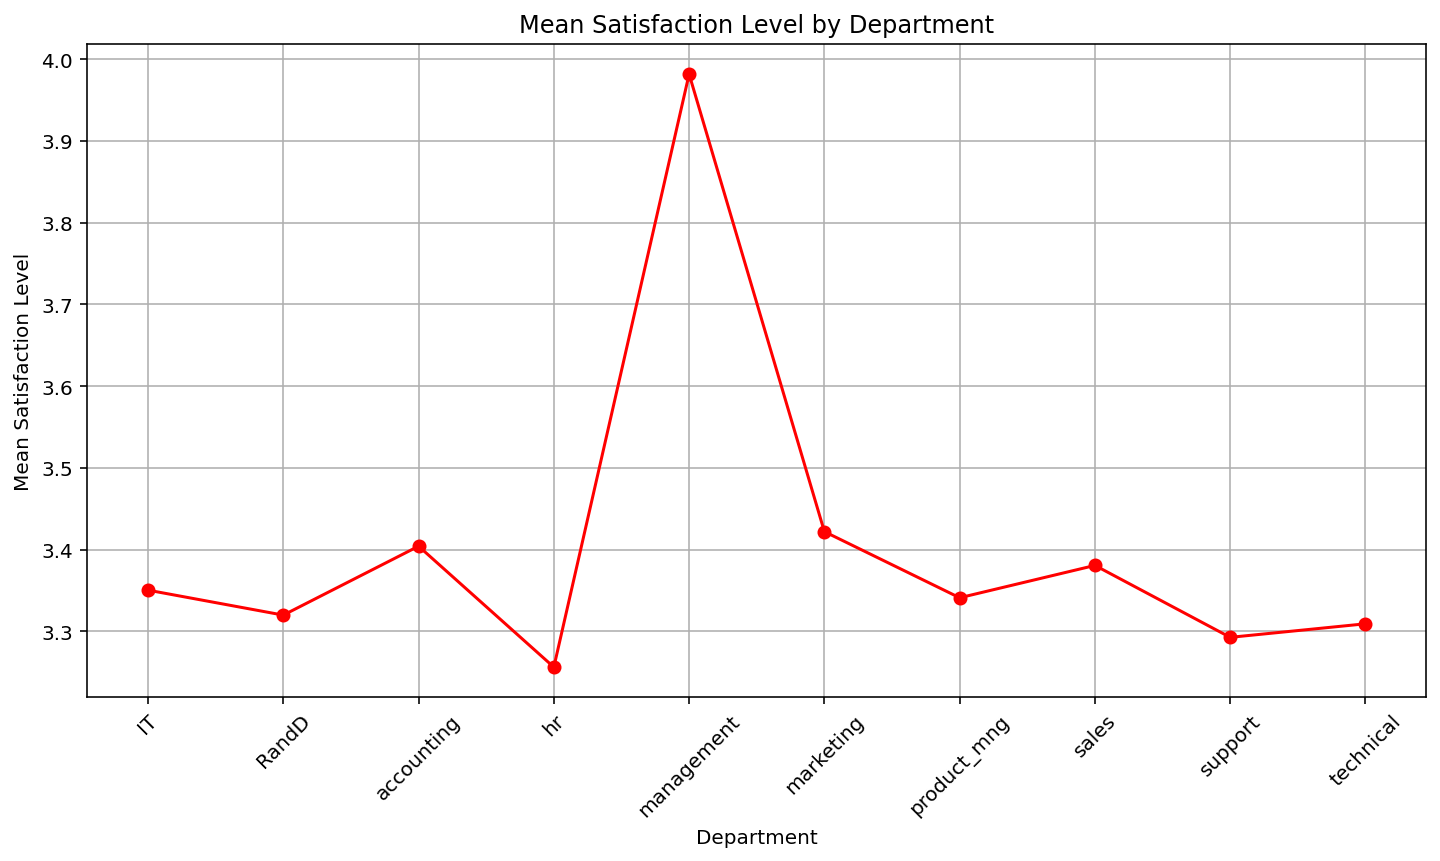

In [53]:
#line graph of which company spent the most time
department_satisfaction_mean = data.groupby('Department')['time_spend_company'].mean()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(department_satisfaction_mean.index, department_satisfaction_mean.values, marker='o', color='r', linestyle='-')
plt.xlabel('Department')
plt.ylabel('Mean Satisfaction Level')
plt.title('Mean Satisfaction Level by Department')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()